In [34]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as py

In [153]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, 
                          n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False,
                          class_sep = 10)

In [231]:
def GD(X, y):
    X = np.insert(X, 0, 1, axis=1)
    W = np.ones(X.shape[1])
    lr = 0.01

    for i in range(5000):
        y_hat = sigmoid(np.dot(X, W))
        W += lr * np.dot(y-y_hat, X)/X.shape[0]

    return W[0], W[1:]

In [233]:
def sigmoid(n):
    return 1/(1+np.exp(-n))

In [235]:
intercept, coeff = GD(X, y)

In [237]:
intercept, coeff

(2.0256329593807094, array([3.59596114, 0.04434871]))

In [239]:
m = -(coeff[0] / coeff[1])
b = -(intercept / coeff[1])
m, b

(-81.08377845329758, -45.67512481118105)

In [240]:
x_inputs = np.linspace(-5, 5, 100)
y_inputs = m*x_inputs + b

In [241]:
from sklearn.linear_model import LogisticRegression

In [245]:
lor = LogisticRegression()

In [247]:
lor.fit(X, y)

LogisticRegression()

In [249]:
m2 = -(lor.coef_[0][0]/lor.coef_[0][1])
b2 = -(lor.intercept_[0] / lor.coef_[0][1])

m2, b2

(-126.24706352310277, -81.16386950826441)

In [251]:
y_input2 = x_inputs*m2 + b2

(3.0, -3.0)

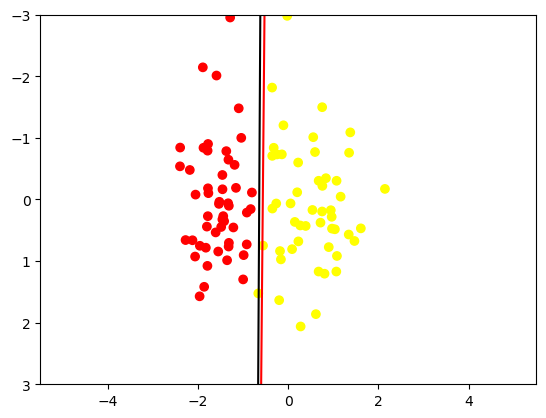

In [253]:
py.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn")
py.plot(x_inputs, y_inputs, color="red")
py.plot(x_inputs, y_input2, color="black", label="sklearn")
py.ylim(3, -3)